<a href="https://colab.research.google.com/github/Kexue-Charlene/INDE577/blob/main/Supervised%20Learning/KNN/Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors Classtering 
k-Nearest Neighbors (KNN), a supervised machine learning algorithm, can be used for either regression or classification tasks. In project, we will use KNN to do a classfication. 
KNN is a non-parametric algorithm which means that assumptions about the underlying distributions of the data is not needed.


In KNN, K is the number of nearest neighbors. K is generally an odd number if the number of classes is 2. 

KNN follows the steps listed below:
1. Calculate distance
2. Find closest neighbors
3. Vote for labels. 

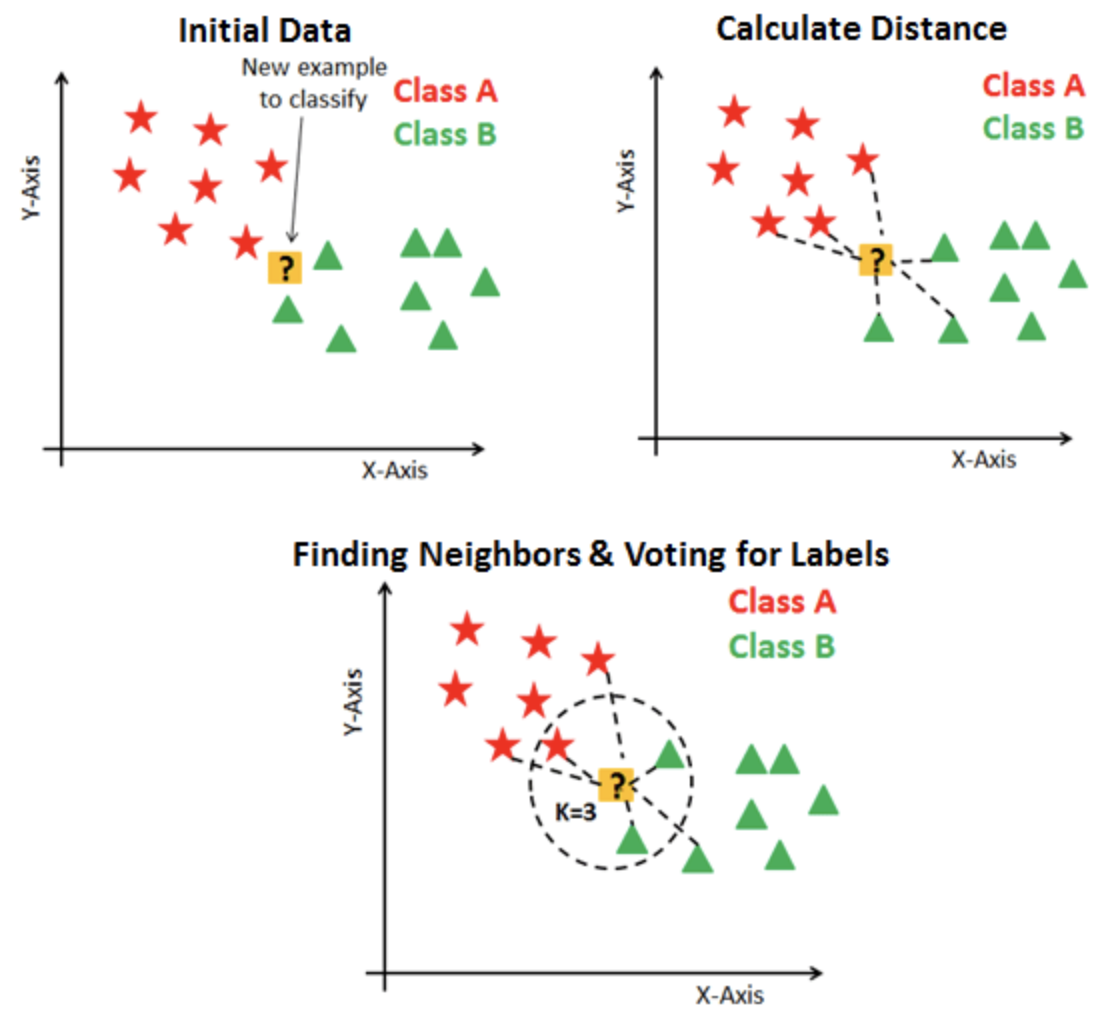

The following packages will be used in this project:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)
*   itertools: [documentation](https://docs.python.org/3/library/itertools.html)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.model_selection import train_test_split

## Data information
The dataset is about diabetes which is downloaded from [Here](https://www.kaggle.com/abdallamahgoub/diabetes)
Parameters:
* The number of pregnancies
* Glucose
* Blood Pressure
* SkinThickness
* Insulin
* BMI
* Pedigree
* Age
* Outcome: 1= diabetes, 0= not diabetes. 


In [ ]:
df=pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


I randomly select BMI and Glucose as the x and y axis displays the following plot. The green points mean that the person has diabetes; the pink points mean that the person doesn't have diabetes. 

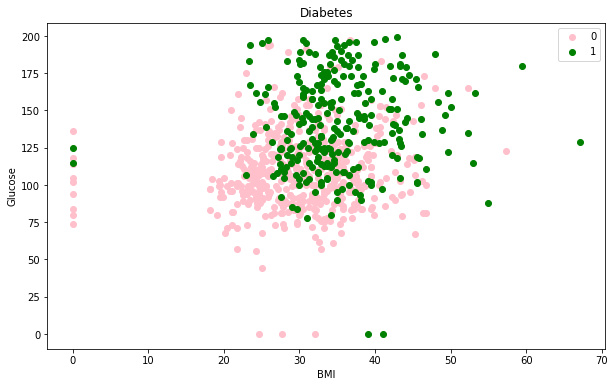

In [ ]:
X = df[["BMI", "Glucose"]].to_numpy()
y = df["Outcome"].to_numpy()
plt.figure(figsize=(10,6))

plt.scatter(X[y==0][:,0],X[y==0][:,1],color="pink",label="0")
plt.scatter(X[y==1][:,0],X[y==1][:,1],color="green",label="1")
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Diabetes')
plt.legend()


There are many variables. Why did I choose BMI and Glucose? In order to find better parameters to do the classification. I plot all useful paired-variables by using the following code:  

In [ ]:
L=list(x for x in combinations(df[["Glucose","BloodPressure","SkinThickness","BMI"]],2))
L

[('Glucose', 'BloodPressure'),
 ('Glucose', 'SkinThickness'),
 ('Glucose', 'BMI'),
 ('BloodPressure', 'SkinThickness'),
 ('BloodPressure', 'BMI'),
 ('SkinThickness', 'BMI')]

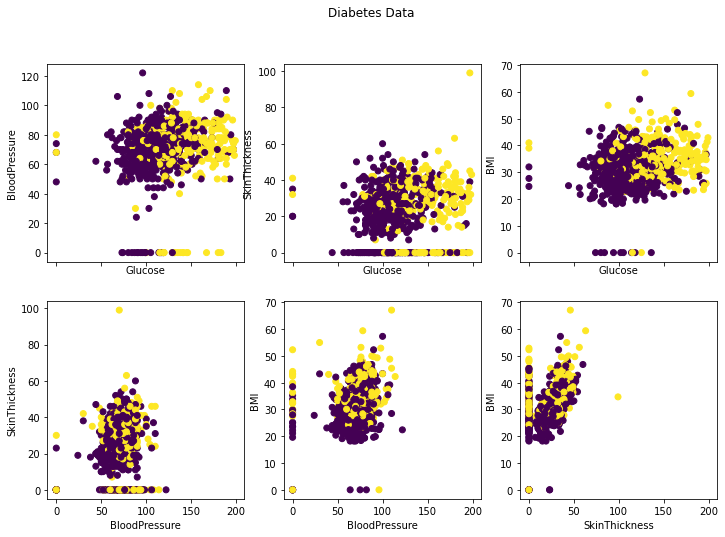

In [ ]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 3, 
                       sharex = True, 
                       figsize = (12, 8))

for p, q in zip(L, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]):
    ax[q[0], q[1]].scatter(df[p[0]],
                           df[p[1]],
                           c = df['Outcome'])
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1])

fig.suptitle('Diabetes Data')
plt.show()

From the above plots, we can see the plots which contain glucose have clearer segments than the plots which didn't contain glucose. Thus, I choose variable glucose and BMI. 

In [ ]:
X = df[["BMI", "Glucose"]].to_numpy()
y = df["Outcome"].to_numpy()

Divide the dataset into traing data and testing data: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

## Calculating distance
The distance between points is determined by using one of several versions such as Minkowski distance and Euclidean distance. The generalized formula for Minkowski distance can be represented as follows:....
* p = 1: Manhattan (or Taxicab) distance
* p = 2 :Euclidean distance. 
The higher orders of p, the Minkowski distance becomes more abstract.
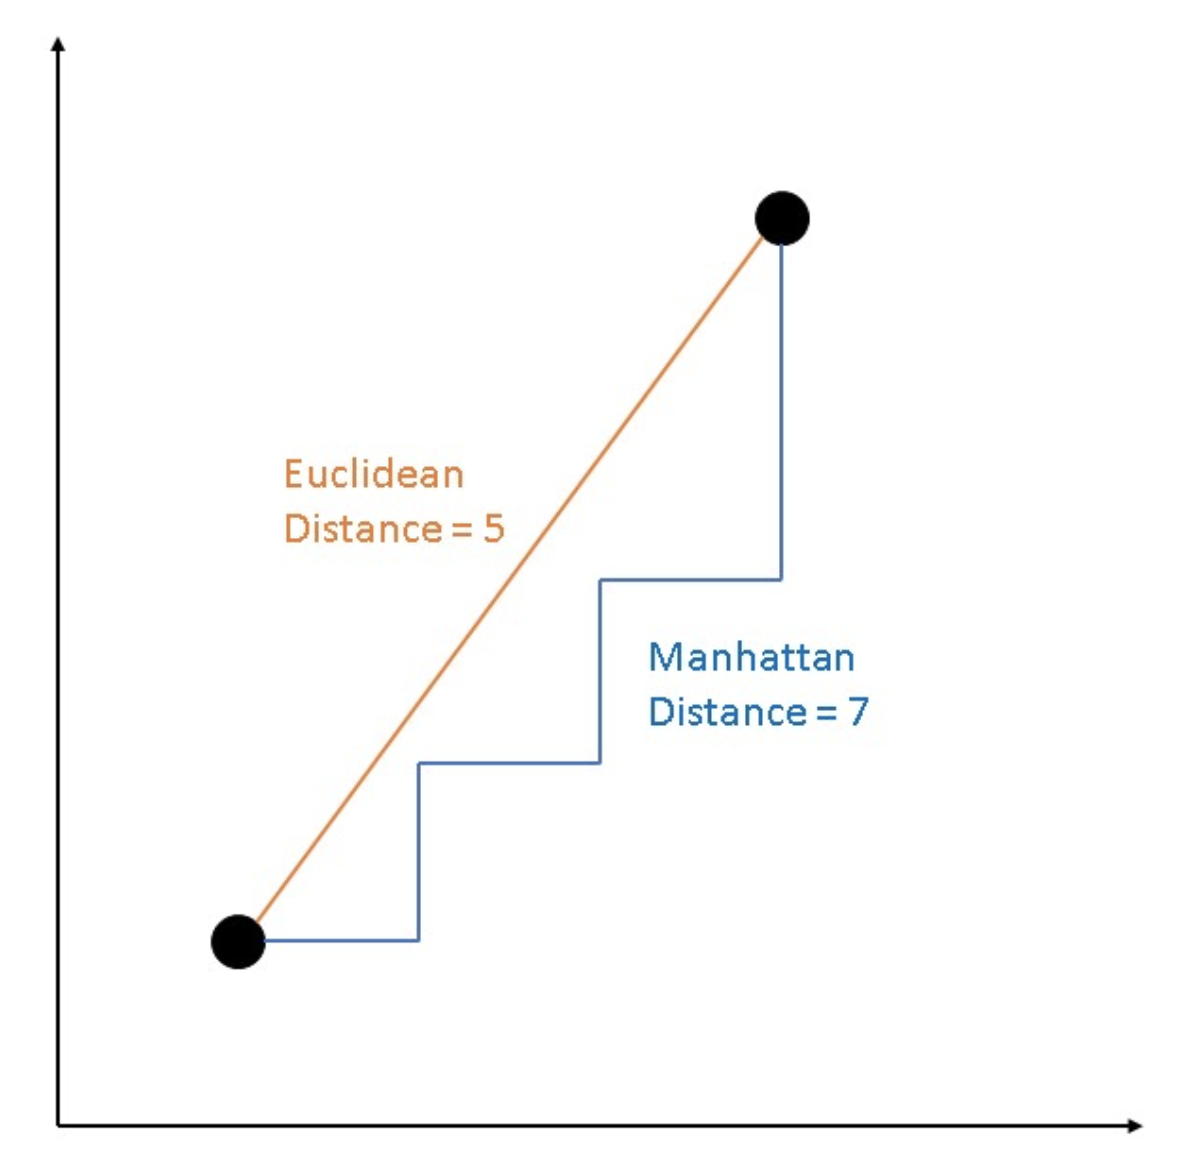

In [ ]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [ ]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/k

In [ ]:
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

## How can we determine the k? 
* Small number of k: the noise will have a higher influence on the result. 
                     low bias but high variance
* Large number of k: make it computationally expensive. 
                     lower variance but higher bias (smoother decision boundary)
Generally, data scientistes choose odd number if the number of class is even. 
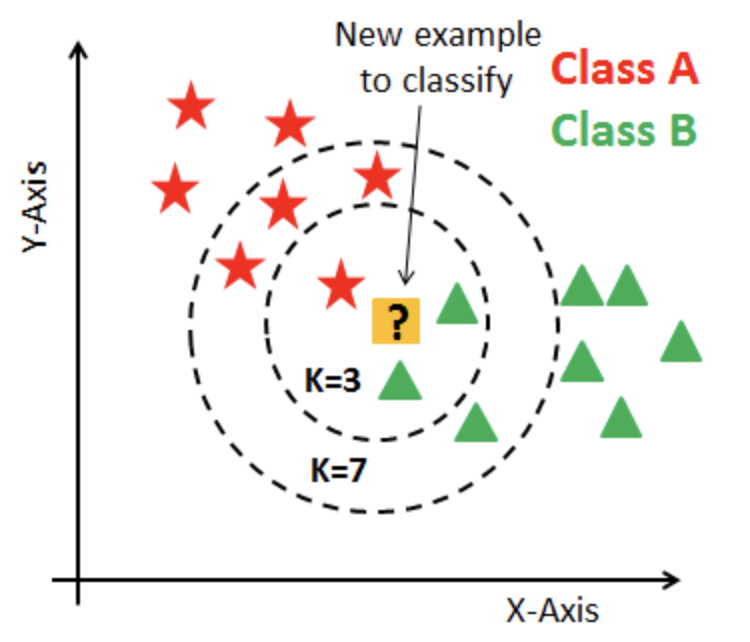

We built a classification error function before. We can use the Elbow method to select the optimal number of k. Before k=9, the curve drops repeatedly; After k=9, the curve drops smoother. When k=9, the error is perfect.  


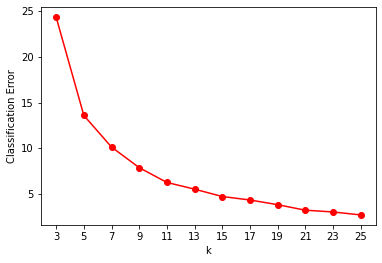

In [ ]:
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

Use k=9 to do the KNN prediction. 

In [ ]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                9) for point in X_test]

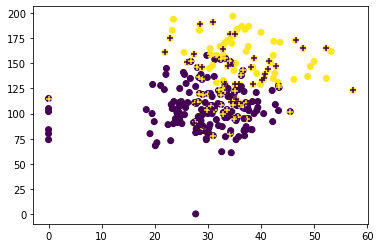

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.predict(X_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                9,
                                regression = True)
                    for point in X_test]

Plot true y in blue and predict y in orange. Some of them are correct since the outcome in the dataset is category 0 and 1, whereas predict y is a continuous number. Hard to tell the accuracy. 

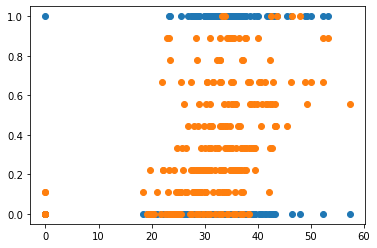

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicted_labels)

## Accuracy
The accuracy score is 73%. Not bad. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=9, p=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")

Sklearn KNN Accuracy: 0.7283464566929134


The following plot shows the accuracy with different numbers of nearest neighbors. When k=5, the accuracy is the highest, however, the error might be larger and variance might be higher. We cannot choose 10 because it is an even number. The nine nearest neighbors are the best to this model.   

Text(0, 0.5, 'Accuracy %')

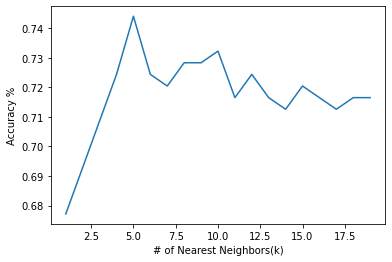

In [ ]:
accuracies = []
for k in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=k, p=1)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_test))
plt.plot(range(1,20),accuracies)
plt.xlabel('# of Nearest Neighbors(k)')
plt.ylabel('Accuracy %')

# Reference 
Avinash Navlani. Tutorials. KNN Classification using Scikit-learn. August 2nd,2018. https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn